# 2017 VA House of Delegates Election

## Preparing the data

### precinct.data

I'm going to do the same cleaning that I do here (https://htmlpreview.github.io/?https://github.com/madiemoxie/ap-research-redistricting/blob/master/mcmc/VA_HOD_2017_tocsv.html), but in R so that I don't have to deal with the mess of trying to export python data frames to .rda files. 

In [1]:
library(sf)
library(ggplot2)
library(dplyr)
library(tibble)
library(magrittr)

precinct.data <- st_read("../data/VA-shapefiles-master/VA_precincts/VA_precincts.shp")

# copy over useful cols and rename them
precinct.data <- precinct.data %>%
    select(pop = TOTPOP,
           vap = VAP,
           obama = G17DHOD,
           mccain = G17RHOD,
           TotPop = TOTPOP,
           BlackPop = NH_BLACK,
           HispPop = HISP,
           VAP_1 = VAP,
           BlackVAP = BVAP,
           HispVAP = HVAP,
           geometry = geometry)
# add col geoid10 based off of index
precinct.data <- cbind(geoid10 = rownames(precinct.data), precinct.data)
# change all cols to numeric type
precinct.data %<>% 
      mutate_each(funs(if(is.character(.)) as.numeric(.) else .))
head(precinct.data)

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Reading layer `VA_precincts' from data source `C:\Users\madie\ap-research-redistricting\data\VA-shapefiles-master\VA_precincts\VA_precincts.shp' using driver `ESRI Shapefile'
Simple feature collection with 2439 features and 56 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -373531.2 ymin: 60026.37 xmax: 380257.5 ymax: 385298.6
projected CRS:  Lambert_Conformal_Conic


Warning message:
"`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."
Warning message:
"`mutate_each_()` is deprecated as of dplyr 0.7.0.
Please use `across()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


,geoid10,pop,vap,obama,mccain,TotPop,BlackPop,HispPop,VAP_1,BlackVAP,HispVAP,geometry
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [m]>
1,1,3652,2475,650,804,3652,304,316,2475,199,215,MULTIPOLYGON (((163199.1 30...
2,2,3818,2675,601,644,3818,405,469,2675,288,313,MULTIPOLYGON (((162078.8 30...
3,3,4497,2877,963,1027,4497,505,561,2877,345,346,MULTIPOLYGON (((163554 3082...
4,4,8229,5780,788,279,8229,1620,3735,5780,1137,2391,MULTIPOLYGON (((171765.7 31...
5,5,3655,2707,460,474,3655,290,1126,2707,221,726,MULTIPOLYGON (((174200.2 31...
6,6,6039,4664,769,347,6039,1178,1566,4664,883,1025,MULTIPOLYGON (((171651 3097...


### adjlist

The second part that MCMC requires is an `adjlist`, or a list for every precinct of the precinct that it is adjacent to. This can be accomplished by using the `poly2nb` function from the `spdep` package.

In [2]:
library(sp)
library(spData)
library(spdep)

adjlist <- poly2nb(precinct.data, queen = FALSE) # queen = FALSE means that being kitty corner doesn't qualify.
adjlist

Neighbour list object:
Number of regions: 2439 
Number of nonzero links: 13758 
Percentage nonzero weights: 0.2312766 
Average number of links: 5.640836 

### cdmat

According to the `redist` people, `cdmat` "contains all possible congressional districts under the population constraint for that object as a matrix."

## test run

In [3]:
va.full <- list(adjlist, precinct.data)
va.full

[[1]]
Neighbour list object:
Number of regions: 2439 
Number of nonzero links: 13758 
Percentage nonzero weights: 0.2312766 
Average number of links: 5.640836 

[[2]]
Simple feature collection with 2439 features and 11 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -373531.2 ymin: 60026.37 xmax: 380257.5 ymax: 385298.6
projected CRS:  Lambert_Conformal_Conic
First 10 features:
   geoid10  pop  vap obama mccain TotPop BlackPop HispPop VAP_1 BlackVAP
1        1 3652 2475   650    804   3652      304     316  2475      199
2        2 3818 2675   601    644   3818      405     469  2675      288
3        3 4497 2877   963   1027   4497      505     561  2877      345
4        4 8229 5780   788    279   8229     1620    3735  5780     1137
5        5 3655 2707   460    474   3655      290    1126  2707      221
6        6 6039 4664   769    347   6039     1178    1566  4664      883
7        7 7436 5454   960    537   7436     1243    2286  5454      897
8     

In [4]:
library(redist)

va <- cbind(precinct.data)
head(va)

,geoid10,pop,vap,obama,mccain,TotPop,BlackPop,HispPop,VAP_1,BlackVAP,HispVAP,geometry
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [m]>
1,1,3652,2475,650,804,3652,304,316,2475,199,215,MULTIPOLYGON (((163199.1 30...
2,2,3818,2675,601,644,3818,405,469,2675,288,313,MULTIPOLYGON (((162078.8 30...
3,3,4497,2877,963,1027,4497,505,561,2877,345,346,MULTIPOLYGON (((163554 3082...
4,4,8229,5780,788,279,8229,1620,3735,5780,1137,2391,MULTIPOLYGON (((171765.7 31...
5,5,3655,2707,460,474,3655,290,1126,2707,221,726,MULTIPOLYGON (((174200.2 31...
6,6,6039,4664,769,347,6039,1178,1566,4664,883,1025,MULTIPOLYGON (((171651 3097...


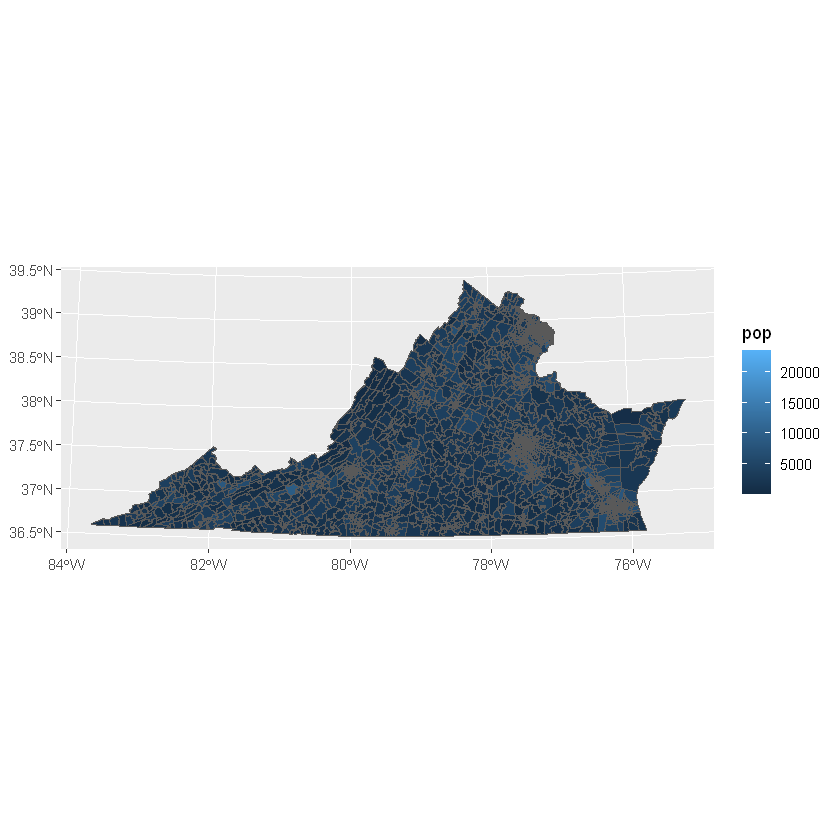

In [5]:
va %>% ggplot(aes(fill = pop)) + 
  geom_sf()

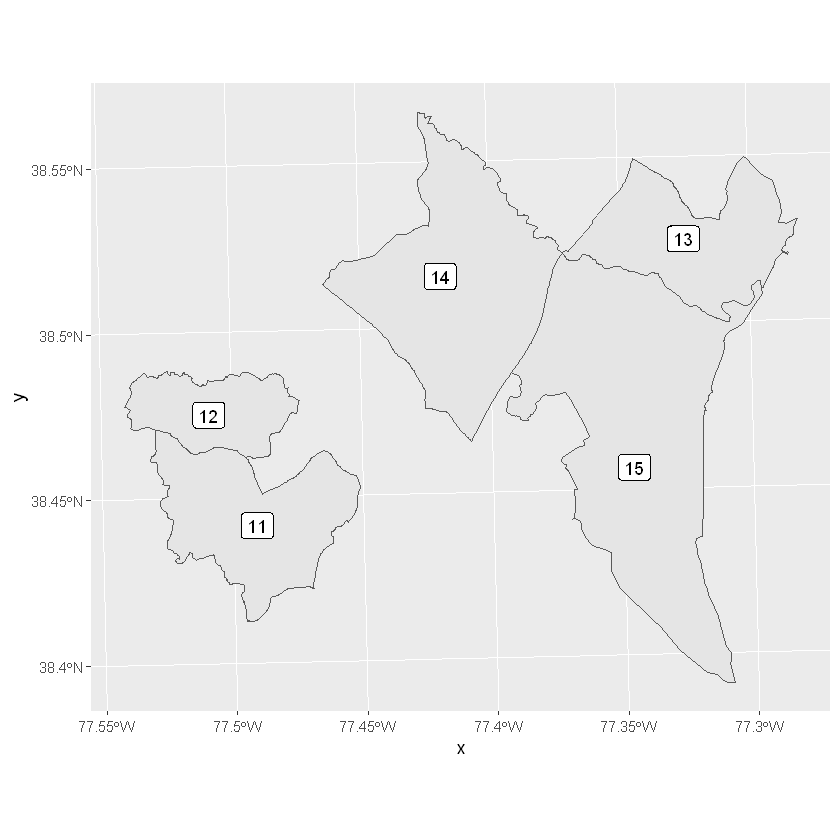

In [6]:
va$id <- 1:2439
va[c(11, 12, 13, 14, 15),] %>% ggplot() + 
  geom_sf() +
  geom_sf_label(aes(label = id))

In [7]:
adjlist[[15]]

[1] 13 14 18 19 20 28


Attaching package: 'igraph'


The following object is masked from 'package:tibble':

    as_data_frame


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




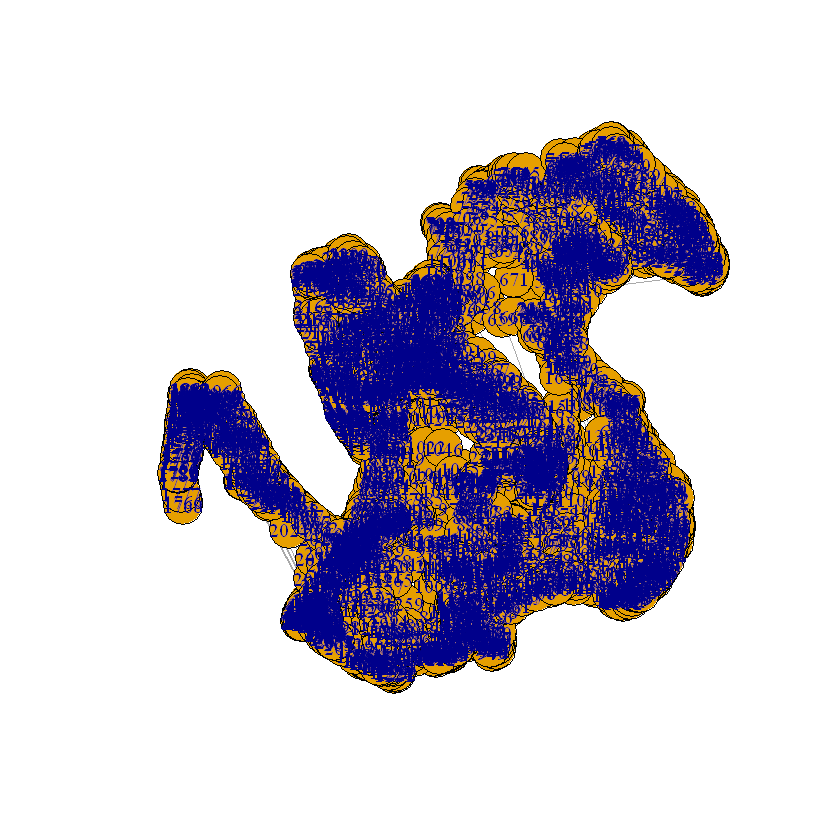

In [8]:
library(igraph)

plot(graph_from_adj_list(adjlist, mode = 'total'))

In [9]:
for(i in 1:25){
  adjlist[[i]] <- adjlist[[i]]-1
}

In [12]:
adjlist[[15]]
class(adjlist)

[1] 12 13 17 18 19 27

[1] "nb"

In [11]:
va.mcmc <- redist.mcmc(adjobj = va.full$adjlist,
                    popvec = va.full$precinct.data$pop,
                    ndists = 100,
                    nsims = 10000,
                    savename = "redist.mcmc.va")


redist.mcmc(): Automated Redistricting Simulation Using
         Markov Chain Monte Carlo

Preprocessing data.



ERROR: Error in redist.preproc(adjobj = adjobj, popvec = popvec, initcds = initcds, : Please input an adjacency list, adjacency matrix, or Spatial
                 Polygons shp file
